<center>
    
## Final Capstone Project

# Booking Cancellation and Booking Demand Analysis at a Major Resort Hotel

 ### by Aigo Madakimova
 

 
 <center>

<center>
   
# Research Question:

## Can I forecast booking demand and cancellation rate within a reasonable degree of accuracy?
</center>

## INTRODUCTION TO THE HOTEL BOOKINGS DATASET

The dataset was obtained from Kaggle: https://www.kaggle.com/jessemostipak/hotel-booking-demand

The original data was provided by Nuno Antonio and Ana de Almeida and is located here: https://www.sciencedirect.com/science/article/pii/S2352340918315191?via%3Dihub

The exact provenance of the data is not provided, however the authors indicate that it is real world data.

The data is of fulfilled and cancelled hotel bookings between July 2015 and August 2017. It includes arrival time, length of stay, number in party, country of provenance, and other customer marketing and demographic information.

### Data column definitions:


<b>is_canceled: Value indicating if the booking was canceled (1) or not (0)</b>

    This is our target variable for the models. I chose a model to predict if bookings would cancel because I believe it would be a very valuable to know in order to plan how reservations could be accepted without worrying about overbooking, and to better forecast cash flows based on booking volume.
    

<b>lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.</b>

    How long before arrival was the booking made?
    
<b>
arrival_date_year: Year of arrival date
arrival_date_month: Month of arrival date
arrival_date_week_number: Week number of year for arrival date
arrival_date_day_of_month: Day of arrival date</b>

    For what date was the booking made?
    

<b>stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel</b>


    How long did the client intend to stay?
<b>
adults: Number of adults
children: Number of children
babies: Number of babies</b>

    For how many people was the booking made?
    
<b>
meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)</b>

    The meal package that the customer puchased

    
<b>country: Country of origin. Categories are represented in the ISO 3155–3:2013 format</b>

    What country are they from?
    

<b>market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”</b>

    These columns refer to what industry and marketing channel the customer was sold from.
    

<b>is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)</b>

    Has the customer stayed at the hotel before?
    
<b>
previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking</b>

    How many previous bookings has the customer made and canceled or not canceled?

<b>
reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.</b>

    What kind of room did the customer book?


<b>booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.</b>

    How many times did the customer change the bookign?

<b>
deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.</b>

    Did the customer make a deposit? Was it non-refundable?


<b>agent: ID of the travel agency that made the booking</b>

    Did a travel agent make the booking? Which one?
    
<b>
company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons</b>

    Is the customer traveling on business? For which company?

<b>
days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer</b>

    Was the booking on the waiting list? For how long?


<b>customer_type: Type of booking, assuming one of four categories:

Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group;
    
Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 

Transient-party – when the booking is transient, but is associated to at least other transient booking</b>

    Is is a group reservation?
<b>
adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights</b>

    How much did they pay per night?

</b>
required_car_parking_spaces: Number of car parking spaces required by the customer</b>

    How much parking was needed?

<b>
total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)</b>

    How many special request did the customer make?
    
<b>
reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why</b>

    How was the booking closed?

<b>
reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel<b>
    
    When was the booking canceled or fulfilled?

## Exploratory Data Analysis

In [1]:
#Importing libraries and data:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import to dataframe
df = pd.read_csv('hotel_bookings.csv')

#There are two hotels in the data set.
#For increased model accuracy and applicability, I will examine only the Resort Hotel.
df = df[df['hotel'] == 'Resort Hotel']

In [3]:
#See data types and column names
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40060 entries, 0 to 40059
Data columns (total 32 columns):
hotel                             40060 non-null object
is_canceled                       40060 non-null int64
lead_time                         40060 non-null int64
arrival_date_year                 40060 non-null int64
arrival_date_month                40060 non-null object
arrival_date_week_number          40060 non-null int64
arrival_date_day_of_month         40060 non-null int64
stays_in_weekend_nights           40060 non-null int64
stays_in_week_nights              40060 non-null int64
adults                            40060 non-null int64
children                          40060 non-null float64
babies                            40060 non-null int64
meal                              40060 non-null object
country                           39596 non-null object
market_segment                    40060 non-null object
distribution_channel              40060 non-null object
is_

## EDA: Missing Values

The only columns missing data are country, agent, and company.

### Country

For country, almost all rows are populated (39596/40060 = 98.84%), since no reasonable replacement value can be deduced from examining the data, and since so little data is missing, these rows can be dropped.

In [4]:
#Drop rows missing country data.
df = df.dropna(subset=['country'])

#Verify
print(df['country'][df['country'].isna()].head(1))

#Reset index for later dimensionality reduction algorithms.
df = df.reset_index()

Series([], Name: country, dtype: object)


### Agent

For agent, a missing value has meaning: the customer made the booking directly instead of via a travel agency. At (103050/119390 = 86.3%) of the data present, this column is more of a concern that country. 

Since there is not a more reasonable assumption to make than that it means the customer booked without an agent, I will replace the missing values with a code to indicate this.

This will allow me to treat the missing values as a group.

I will also add a new feature which will directly indicate whether or not the booking was made by an agent.

In [5]:
#AGENT: fill missing values with placeholder for self-booking

#Decide on placeholder value
print('max:', df.agent.max())
print('min:', df.agent.min())

#The placeholder for self-booking will be the max value plus one: 536

#Fill
df['agent'] = df['agent'].fillna(536.0)

#Verify
print(df['agent'].isna().head(1))

#New derived feature
df['self_booked'] = df['agent'] != 536.0

max: 535.0
min: 1.0
0    False
Name: agent, dtype: bool


### Company
For company, missing data also has meaning: the customer was not travelling for business, or that the trip was not paid for by a business.

With around 5% of the data missing, we could have some potentially significant consequences on the model if we don't distinguidsh between business and non-business customers

As with agent, a placeholder will be used to indicate non-business bookings, which will allow us to examine them as a group.

In [6]:
#COMPANY: fill missing values with placeholder for no company
print('max:', df.company.max())
print('min:', df.company.min())

#There is no company id "1", we can use that as our placeholder

#Fill
df['company'] = df['company'].fillna(5.0)

#Verify
print(df['company'].isna().head(1))

#New derived feature
df['on_business'] = df['company'] != 5.0

max: 543.0
min: 6.0
0    False
Name: company, dtype: bool


## EDA: Univariate Analysis

### Cancellation Frequency

More bookings are kept than are canceled, but 28% of all bookings are canceled.

A very small portion of the cancellations are no-shows, less than 1%, I will treat cancellation as binary and use the is_cancelled column only.

Check-Out    28519
Canceled     10790
No-Show        287
Name: reservation_status, dtype: int64


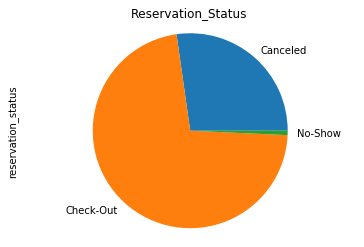

In [7]:
#More bookings are kept than are canceled, but 28% of all bookings are canceled!

print(df.reservation_status.value_counts())

#Only 291 of the reported cancellations were no-shows, 291/40060 = 0.73%

#Plot
df.reservation_status.groupby(df.reservation_status).value_counts().plot(kind='pie',labels=['Canceled','Check-Out','No-Show'])
plt.axis('equal')
plt.title('Reservation_Status')
plt.show()

#Drop unused column
df = df.drop(columns=['reservation_status'])

### Lead Time

The 'elbow' in the frequency of various booking lead times occurs at around 1 1/2 weeks when aggreagated by week, and at 2 days when aggregated by day. There is a pronounced bump at 7 days. 

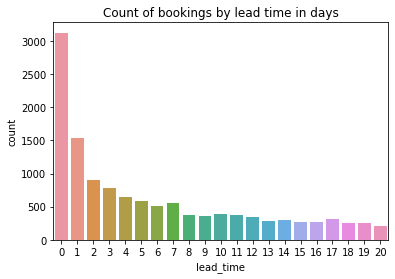

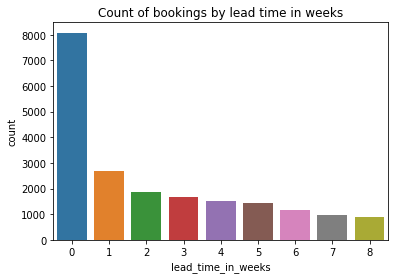

In [8]:
#Lead time frequencies
df['lead_time_in_weeks'] = df['lead_time'] // 7

sns.countplot(x='lead_time', data=df[df['lead_time']<=20])
plt.title('Count of bookings by lead time in days')
plt.show()

sns.countplot(x='lead_time_in_weeks', data=df[df['lead_time_in_weeks']<=8])
plt.title('Count of bookings by lead time in weeks')
plt.show()

In [9]:
#How many book with less than one week lead time? 
#How many book with more than one week lead time?

print('Less than one week:', (df['lead_time'][df['lead_time']<6]).count())

print('One week or more:', (df['lead_time'][df['lead_time']>=7]).count())

Less than one week: 7562
One week or more: 31519


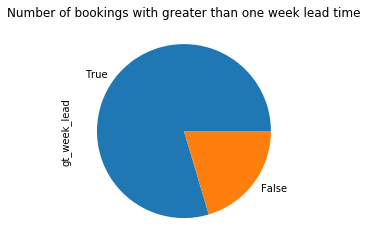

In [68]:
df['gt_week_lead'] = df['lead_time'] >= 7
df.gt_week_lead.value_counts().plot(kind='pie')
plt.title('Number of bookings with greater than one week lead time')
plt.show()

### Arrival Date

Seasonal trends are shown in the plots below. Arrival date by week number is the best, but is still quite noisy.

Overall, with only 2 years and 2 months of data from only one hotel, I think It would be unwise to choose the arrival date for our model.

These will be dropped.

##### Arrival Date data manipulation

In [11]:
#A standardized datetime object will be needed for some analysis

#import library
from datetime import datetime
from datetime import date
import calendar

In [12]:
#numerize month
name_to_num = {name: num for num, name in enumerate(calendar.month_name) if num}
df['arrival_date_month'] = df['arrival_date_month'].map(name_to_num)

In [13]:
#check
print(df['arrival_date_month'].isna().unique())
print(df['arrival_date_month'].max())
print(df['arrival_date_month'].min())

[False]
12
1


In [14]:
#create column of datetime objects
df['arrival_date'] = df.apply(lambda row: datetime.strptime(f"{int(row.arrival_date_year)}-{int(row.arrival_date_month)}-{int(row.arrival_date_day_of_month)}", '%Y-%m-%d').date(), axis=1)

#### Year

In [15]:
#booking counts by year
print(df.arrival_date_year.value_counts(), '\n')

#check for partial years
print("First recorded date is:", df.arrival_date.max())
print("Last recorded date is:", df.arrival_date.min())

2016    18300
2017    13100
2015     8196
Name: arrival_date_year, dtype: int64 

First recorded date is: 2017-08-31
Last recorded date is: 2015-07-01


#### Month

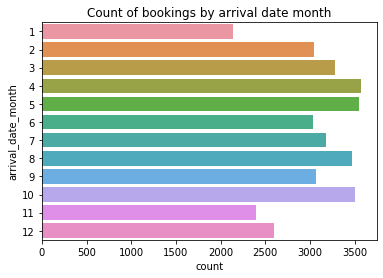

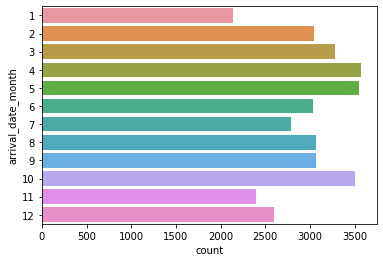

In [16]:
#for countplots, import seaborn
import seaborn as sns

#We need to adjust the data to not count July and August and extra time compared to the other months
#(because of 2 years + 2 months data)
date1 = date(2015,9,1)
date2 = date(2017,7,1)

#Two ways to cut our years
wo_first_two = pd.DataFrame(df[df['arrival_date'] >= date1])
wo_last_two = pd.DataFrame(df[df['arrival_date'] < date2])

#Without first two months
sns.countplot(y='arrival_date_month', data=wo_first_two)
plt.title('Count of bookings by arrival date month')
plt.show()

#Without last two months
sns.countplot(y='arrival_date_month', data=wo_last_two)
plt.show()

#### Week

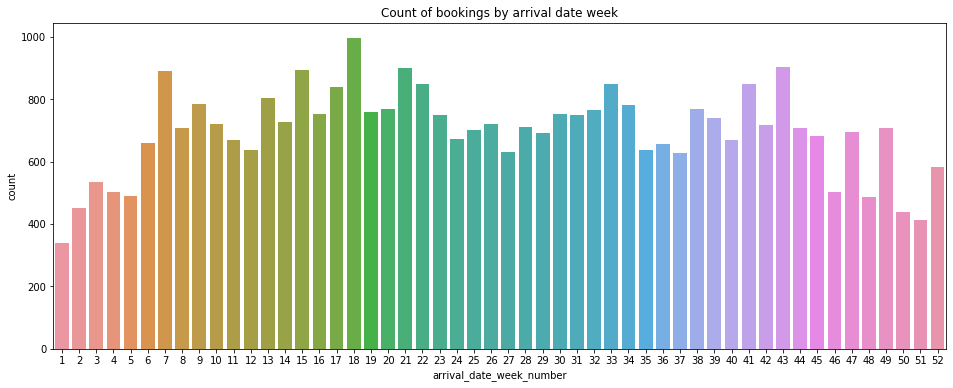

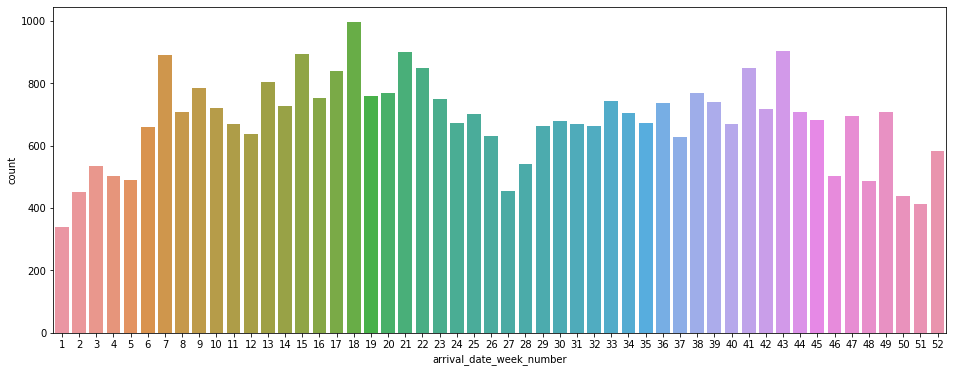

In [41]:
#Arrival Date by Week

#Create a string to set the order of rows in plot:
week_order = np.arange(1,53)
   
#cast to string to permit ordering
df.arrival_date_week_number = df.arrival_date_week_number.astype(str)

#plot
plt.figure(figsize=(16,6))
sns.countplot(x='arrival_date_week_number', data=wo_first_two, order=week_order)
plt.title('Count of bookings by arrival date week')
plt.show()

plt.figure(figsize=(16,6))
sns.countplot(x='arrival_date_week_number', data=wo_last_two, order=week_order)
plt.show()

#There is a discernible trend in bookings by week, but the data is quite variable, leading to
#a lower correlation. I don't think arrival date will be a very good metric for the model.

#### Day of Month

In [18]:
#Arrival Date by day of month

df.arrival_date_day_of_month.value_counts()

#There does not seem to be a discernbilbe pattern here.

12    1567
30    1453
5     1439
16    1406
9     1390
26    1389
17    1379
2     1370
18    1362
24    1357
25    1321
3     1304
15    1301
19    1294
4     1286
1     1277
11    1263
22    1258
28    1257
27    1250
8     1232
29    1201
14    1199
7     1198
21    1187
20    1184
6     1175
10    1168
23    1162
13    1120
31     847
Name: arrival_date_day_of_month, dtype: int64

### Length of Stay

The most comman length of stay is two to four days. One-day and week-long stays are also very popular. The median length of stay is 4 days.

#### Total Length of Stay

In [20]:
#Get total length of stay
df['length_of_stay'] = df.stays_in_weekend_nights + df.stays_in_week_nights

df.length_of_stay.median()

4.0

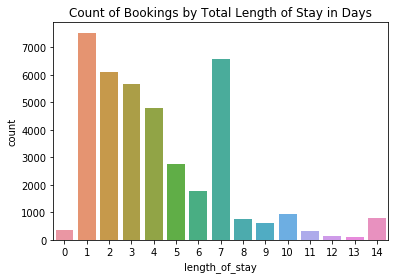

In [49]:
sns.countplot(x='length_of_stay', data=df[df['length_of_stay'] <= 14])
plt.title('Count of Bookings by Total Length of Stay in Days')
plt.show()

#### Weekends

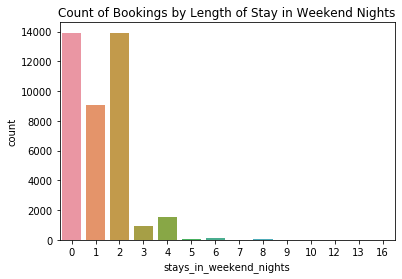

In [50]:
sns.countplot(x='stays_in_weekend_nights', data=df)
plt.title('Count of Bookings by Length of Stay in Weekend Nights')
plt.show()

#### Weekdays

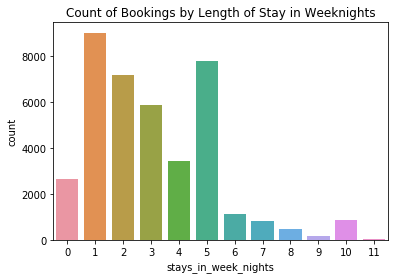

In [52]:
sns.countplot(x='stays_in_week_nights', data=df[df['stays_in_week_nights']<12])
plt.title('Count of Bookings by Length of Stay in Weeknights')
plt.show()

### Party Size

The majority of bookings were for two adults, with samller numbers of 1, 3, and 4 person parties

#### Total number in party

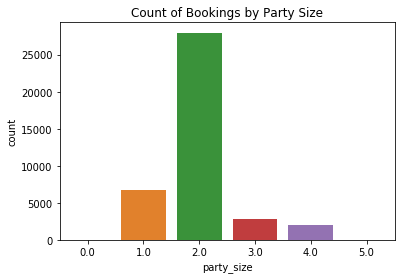

In [54]:
df['party_size'] = df.adults + df.children + df.babies

sns.countplot(x='party_size', data=df[df['party_size']<6])
plt.title('Count of Bookings by Party Size')
plt.show()

### Meal

By far, the most popular meal package is Bed and Breakfast.

BB    29578
HB     8017
SC     1247
FB      754
Name: meal, dtype: int64


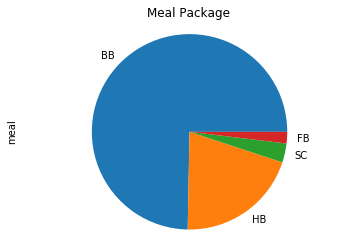

In [25]:
#There is a problem with meal in that 'SC' and 'Undefined' both mean the same thing: no meals.

df.meal.unique()

meal_df = pd.DataFrame(df['meal'])
meal_df = meal_df.replace('Undefined','SC')
df.meal = meal_df.meal

df.meal.unique()

#As above, meal is categorical, we will make it numerical

meal_df = pd.DataFrame(df[['is_canceled','meal']].groupby('meal', as_index=False).agg('mean'))
meal_df = meal_df.rename(index=str, columns={"is_canceled": "meal_score"})
df = pd.merge(df,meal_df,how='left',on=['meal'])

print(df.meal.value_counts())

df.meal.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Meal Package')
plt.show()


### Country

The most frequent countries of origin in this dataset were Portugaal (44.5%), Great Britain (17.1%), Spain (9.9%), Ireland (5.4%), France (4%), and Germany (3%), all other countries composted the remaining 16.1%

In [26]:
print(df.country.value_counts().head(10))

major_countries = ['PRT','GBR','ESP','IRL','FRA','DEU']

df['adj_country'] = df['country']
df['adj_country'] = df['adj_country'].where(df['adj_country'].isin(major_countries), 'Other')

PRT    17630
GBR     6814
ESP     3957
IRL     2166
FRA     1611
DEU     1203
CN       710
NLD      514
USA      479
ITA      459
Name: country, dtype: int64


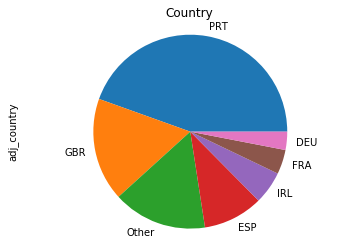

In [27]:
df.adj_country.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Country')
plt.show()

### Market Segment

Business at this hotel is mostly associated with Travel Agents, 44% of the bookings came from online travel agents and 18.6% came from offline travel agents and tour operators. Direct mailing, group marketing, and corporate marketing composed significant portions as well.

Online TA        17655
Offline TA/TO     7427
Direct            6357
Groups            5832
Corporate         2126
Complementary      199
Name: market_segment, dtype: int64


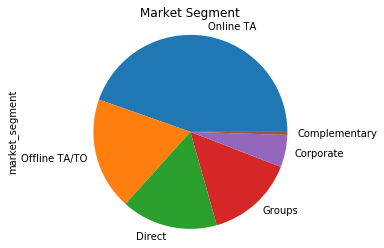

In [28]:
print(df.market_segment.value_counts())

df.market_segment.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Market Segment')
plt.show()

### Returning Customers

In an apparent deviation from the pareto principle, it seems the majority of customers at a resort are first time customers.

0    37822
1     1774
Name: is_repeated_guest, dtype: int64


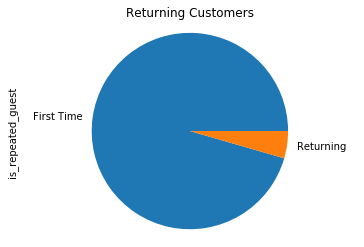

In [29]:
print(df.is_repeated_guest.value_counts())

df.is_repeated_guest.value_counts().plot(kind='pie', labels=['First Time','Returning'])
plt.axis('equal')
plt.title('Returning Customers')
plt.show()

### Reserved and Assigned Room Types

The meaning of this data was retained to protect customer privacy. But large difference can be noted in the A and D types before and after final assignment.

A    23022
D     7405
E     4944
G     1599
F     1099
C      917
H      601
L        6
B        3
Name: reserved_room_type, dtype: int64


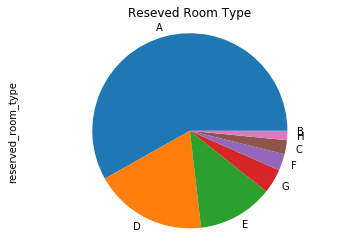

A    16872
D    10183
E     5570
C     2193
G     1839
F     1714
H      708
I      357
B      159
L        1
Name: assigned_room_type, dtype: int64


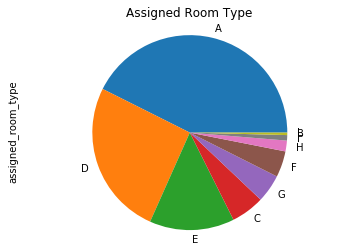

In [30]:
print(df.reserved_room_type.value_counts())

df.reserved_room_type.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Reseved Room Type')
plt.show()

print(df.assigned_room_type.value_counts())

df.assigned_room_type.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Assigned Room Type')
plt.show()

### Booking Changes

Booking changes are not made frequently, 79.7% of bookings are not changed at all. 13.5% of bookings are changed once, 3.8% are changed twice, 1.1% are changed three times, 1.9% of bookings are changed more than three times.

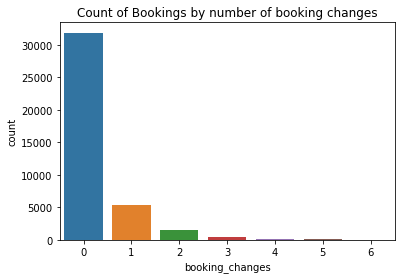

In [55]:
sns.countplot(x='booking_changes', data=df[df['booking_changes']<7])
plt.title('Count of Bookings by number of booking changes')
plt.show()

### Deposit Type

Most bookings do not have a deposit. The few bookings that do have a deposit are almost exclusively non-refundable.

No Deposit    37735
Non Refund     1719
Refundable      142
Name: deposit_type, dtype: int64


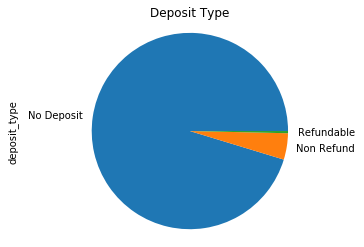

In [32]:
print(df.deposit_type.value_counts())

df.deposit_type.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Deposit Type')
plt.show()

### Agent

80% of bookings were made through a travel agent or tour operator. Of those bookings, 43.7% came from one agent, #240. The top five agents accounted for 64% of bookings made by agent, and 51% of bookings overall. 

However, we must distinguish between bookings made and booings completed. As will be shown later, the average agent cancels 37% of the time.

From the graphs below, we can infer that bookings made through an agents are, overall, somewaht less likely to be cancelled.

An agent cancellation rate metric will be elaborated later on.

240.0    13854
536.0     7883
250.0     2854
241.0     1718
40.0      1002
314.0      920
242.0      778
6.0        600
96.0       525
243.0      514
Name: agent, dtype: int64
True     31713
False     7883
Name: self_booked, dtype: int64


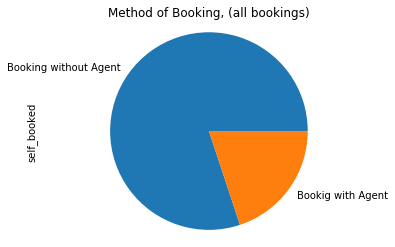

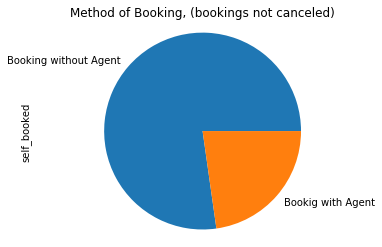

In [33]:
print(df.agent.value_counts().head(10))
print(df.self_booked.value_counts())

df.self_booked.value_counts().plot(kind='pie',labels=['Booking without Agent','Bookig with Agent'])
plt.axis('equal')
plt.title('Method of Booking, (all bookings)')
plt.show()

df['self_booked'][df['is_canceled']==0].value_counts().plot(kind='pie',labels=['Booking without Agent','Bookig with Agent'])
plt.axis('equal')
plt.title('Method of Booking, (bookings not canceled)')
plt.show()

### Company

5.0      36654
223.0      784
281.0      138
154.0      124
405.0      100
94.0        72
498.0       58
331.0       58
47.0        56
110.0       51
135.0       51
Name: company, dtype: int64


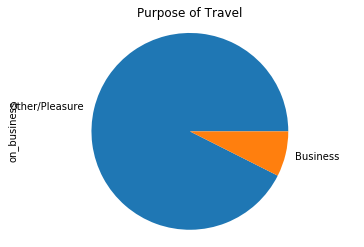

In [59]:
print(df.company.value_counts().head(11))

df.on_business.value_counts().plot(kind='pie',labels=['Other/Pleasure','Business'])
plt.axis('equal')
plt.title('Purpose of Travel')
plt.show()

### Waiting List

The waiting list is seldom used, only 1.15% of bookings are ever on the wait list.

They occur most frequently at week 53 (New Year), week 42 and 43, (October Break?), week 47 (Thanksgiving), week 26 (beginning of summer vacation?) and 17 (Spring Break?)

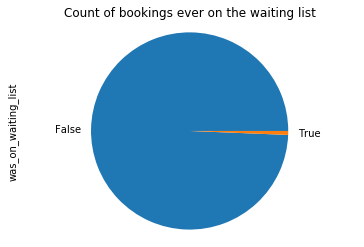

In [61]:
df['arrival_date_week_number'][df['days_in_waiting_list'] > 0].value_counts().head(6)

df['was_on_waiting_list'] = df['days_in_waiting_list'] > 0

df.was_on_waiting_list.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Count of bookings ever on the waiting list')
plt.show()

### Customer Type

Most bookings (74.5%) are stand-alone parties, 19.4% were stand-alone booking associated with other group bookings, smaller portions of bookings were associated with groups or other contracts.

In [36]:
print(df.customer_type.value_counts())



Transient          29792
Transient-Party     7750
Contract            1776
Group                278
Name: customer_type, dtype: int64


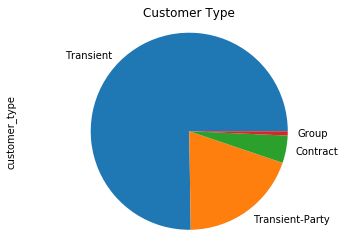

In [37]:
df.customer_type.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Customer Type')
plt.show()

### Average Daily Rate (ADR)

The denomination is not given, but I think we should assume euros, it seems cheap for dollars.

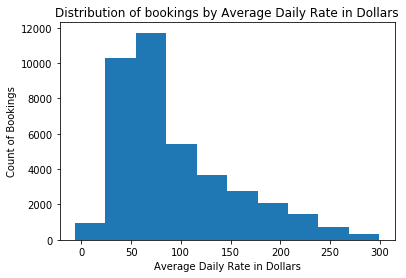

In [65]:
plt.hist(df['adr'][df['adr']<300])
plt.title('Distribution of bookings by Average Daily Rate in Dollars')
plt.xlabel('Average Daily Rate in Dollars')
plt.ylabel('Count of Bookings')
plt.show()

### Required Car Parking Spaces

Booking with more than one required car parking space are exceedinly rare.

In [39]:
df.required_car_parking_spaces.value_counts()

0    34212
1     5356
2       25
8        2
3        1
Name: required_car_parking_spaces, dtype: int64

### Special Requests

One special request is common, more than 3 is rare.

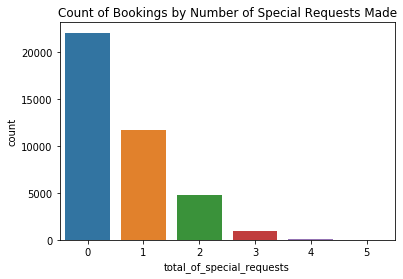

In [66]:
sns.countplot(x='total_of_special_requests', data=df[df['total_of_special_requests']<6])
plt.title('Count of Bookings by Number of Special Requests Made')
plt.show()

## Notebook Summary

In Notebook 1 I did some Exploratory Data Analysis. I highlighted some facets of the data that will become important later in the Time Series Analysis, and especially in the Supervised Learning models that I built.

More exploratory data analysis will be done in Notebook 3.